## 국민연금 데이터를 활용한 연봉 추정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight") 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/user/Desktop/국민연금10.csv', encoding='CP949')
df.head()

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수
0,October,우성기전(주),동력식 수지 공구 제조업,4,899980,0,0
1,October,서능공원묘지운영회(재),화장터 운영 묘지 분양 및 관리업,10,3105220,0,0
2,October,노들새마을금고,신용조합,12,4956440,0,0
3,October,유창성업(주),그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,23,5123500,0,0
4,October,희성전자(주),비주거용 건물 임대업(점포 자기땅),395,187681460,0,1


## 기초통계량 분석

In [9]:
df.shape

(546814, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546814 entries, 0 to 546813
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   자료생성월     546814 non-null  object
 1   사업장명      546814 non-null  object
 2   사업장업종코드명  537560 non-null  object
 3   가입자수      546814 non-null  int64 
 4   당월고지금액    546814 non-null  int64 
 5   신규취득자수    546814 non-null  int64 
 6   상실가입자수    546814 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 29.2+ MB


In [11]:
df.describe(include='all')

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수
count,546814,546814,537560,546814.00,546814.00,546814.00,546814.00
unique,1,509243,1203,NaN,NaN,NaN,NaN
top,October,오하운폴댄스학원,BIZ_NO미존재사업장,NaN,NaN,NaN,NaN
freq,546814,29,71994,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,19.43,6080689.05,0.81,0.63
std,NaN,NaN,NaN,259.56,115695468.37,8.25,7.15
min,NaN,NaN,NaN,0.00,0.00,0.00,0.00
25%,NaN,NaN,NaN,4.00,888660.00,0.00,0.00
50%,NaN,NaN,NaN,6.00,1562400.00,0.00,0.00
75%,NaN,NaN,NaN,12.00,3238875.00,0.00,0.00


In [12]:
df.count()

자료생성월       546814
사업장명        546814
사업장업종코드명    537560
가입자수        546814
당월고지금액      546814
신규취득자수      546814
상실가입자수      546814
dtype: int64

In [13]:
df.corr()

,가입자수,당월고지금액,신규취득자수,상실가입자수
가입자수,1.00,0.98,0.54,0.43
당월고지금액,0.98,1.00,0.45,0.32
신규취득자수,0.54,0.45,1.00,0.59
상실가입자수,0.43,0.32,0.59,1.00


## 월급, 연봉 추정

In [15]:
df['인당고지금액'] = df['당월고지금액'] / df['가입자수']

In [16]:
df['인당고지금액'].head()

0   224995.00
1   310522.00
2   413036.67
3   222760.87
4   475142.94
Name: 인당고지금액, dtype: float64

## <국민연금 정보로 연봉정보를 계산하는 방법>
######
##### 국민연금 보험률: 9%. 즉, 급여(신고소득월액)의 9%를 국민연금으로 내는 것을 의미
##### 이를 절반으로 나누어 4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조(회사는 급여 외에 추가로 금액을 부담)
######
##### 국민연금 보험료는 소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과
##### 이를 역산하면 신고소득월액의 계산이 가능(상한선과 하한선이 설정되어 있어 실제보다 과소계산될 수 있음)
######
##### [수식]
##### 임직원 평균 월급 = 인당고지금액 / 9% * 100%
##### 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [17]:
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [18]:
df['평균연봉'] = df['평균월급'] * 12

In [19]:
df['평균월급'].notnull().sum()

523255

In [20]:
df.head()

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
0,October,우성기전(주),동력식 수지 공구 제조업,4,899980,0,0,224995.00,2499944.44,29999333.33
1,October,서능공원묘지운영회(재),화장터 운영 묘지 분양 및 관리업,10,3105220,0,0,310522.00,3450244.44,41402933.33
2,October,노들새마을금고,신용조합,12,4956440,0,0,413036.67,4589296.30,55071555.56
3,October,유창성업(주),그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,23,5123500,0,0,222760.87,2475120.77,29701449.28
4,October,희성전자(주),비주거용 건물 임대업(점포 자기땅),395,187681460,0,1,475142.94,5279365.96,63352391.56


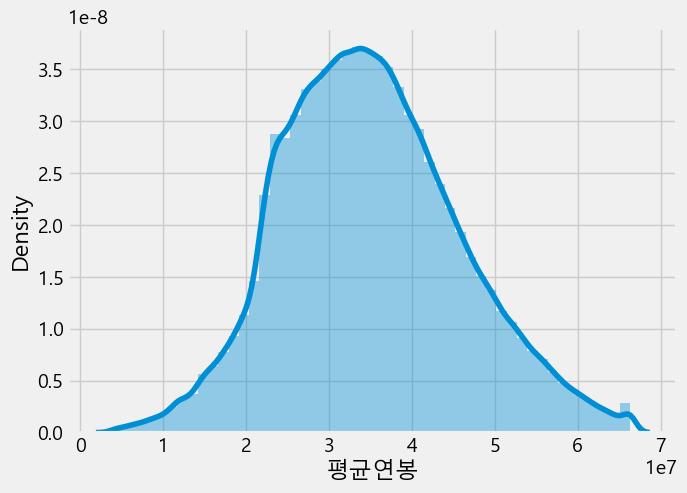

In [21]:
plt.figure(figsize=(7, 5))
sns.distplot(df.loc[df['평균연봉'].notnull(), '평균연봉'])
plt.show()

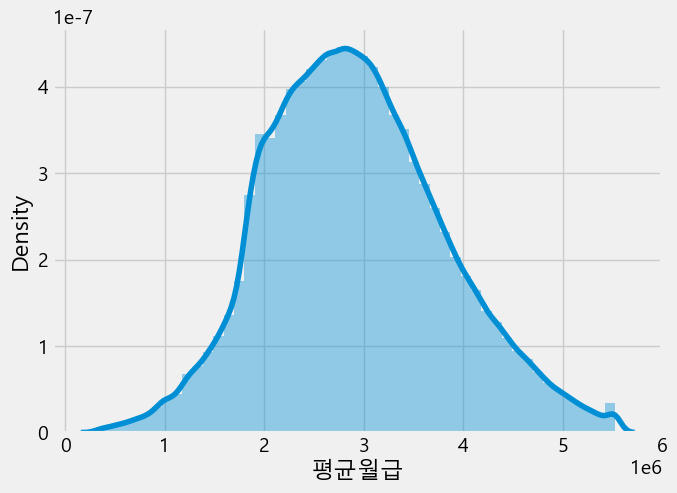

In [22]:
plt.figure(figsize=(7, 5))
sns.distplot(df.loc[df['평균월급'].notnull(), '평균월급'])
plt.show()

## 상위 연봉 기업 리스트 분석

In [23]:
df.sort_values(by='평균연봉', ascending=False).head(20)

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
307409,October,주식회사케이블브릿지(CABLEBRIDGECO. Ltd.),그 외 기타 건축 마무리 공사업,4,1990800,0,0,497700.00,5530000.00,66360000.00
290160,October,아이디어브릿지파트너스유한회사,그 외 기타 분류 안된 금융업,4,1990800,0,0,497700.00,5530000.00,66360000.00
519310,October,(주)지호건설/일용/플루리움 2단지 아파트 외벽 균열보수 및 재도장 공사,미장 타일 및 방수 공사업,11,5474700,0,0,497700.00,5530000.00,66360000.00
535809,October,코디스코리아유한회사,의료용품 도매업,4,1990800,1,0,497700.00,5530000.00,66360000.00
514598,October,주식회사포리스지에프에스케이알리미티드(ForisGFSKRLimited),시스템 소프트웨어 개발 및 공급업,4,1990800,1,0,497700.00,5530000.00,66360000.00
39137,October,(주)세우상사,기타 화학 물질 및 화학제품 도매업,3,1493100,0,0,497700.00,5530000.00,66360000.00
382139,October,주식회사 엔유코퍼레이션,음ㆍ식료품 및 담배 중개업,3,1493100,0,0,497700.00,5530000.00,66360000.00
438331,October,주식회사심원,매니저업,4,1990800,0,0,497700.00,5530000.00,66360000.00
517518,October,(주)보광건설/일용/2022년 포장도로 굴착복구공사(연간단가)-남부,포장 공사업,5,2488500,0,0,497700.00,5530000.00,66360000.00
438330,October,주식회사모아종합건설-(일용)완주 운곡지구 3블록 모아미래도 아파트 건축공사,기타 토목 시설물 건설업,6,2986200,6,0,497700.00,5530000.00,66360000.00


## 상위 신규 채용 기업 리스트 분석

In [25]:
df.sort_values(by='신규취득자수', ascending=False).head(20)

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
4324,October,삼성전자(주),비디오 및 기타 영상 기기 제조업,117613,57232874680,1962,322,486620.31,5406892.35,64882708.18
304793,October,쿠팡풀필먼트서비스 유한회사,화물 포장 검수 및 계량 서비스업,28964,7483863280,1932,1812,258385.00,2870944.50,34451333.98
3410,October,엘지이노텍(주),기타 반도체 소자 제조업,15696,5900219800,1140,564,375905.95,4176732.78,50120793.41
43577,October,한국맥도날드유한회사(A),NaN,8328,840796320,1070,1128,100960.17,1121779.70,13461356.39
69146,October,연세대학교,요양병원,1518,185192680,1014,35,121997.81,1355531.25,16266375.05
5008,October,(주)에스씨케이컴퍼니,커피 및 차류 도매업,20760,3706683180,877,757,178549.29,1983880.96,23806571.48
214626,October,주식회사비케이알(버거킹),치킨 전문점,4719,461921680,810,587,97885.50,1087616.68,13051400.16
394635,October,씨제이올리브영주식회사-비정규,화장품 및 화장용품 도매업,4131,402539100,739,1032,97443.50,1082705.56,12992466.72
520101,October,케이워터기술주식회사,시설물 유지관리 공사업,765,259298080,728,10,338951.74,3766130.43,45193565.14
394747,October,(주)케이에스한국고용정보,콜센터 및 텔레마케팅 서비스업,5241,995592920,672,309,189962.40,2110693.29,25328319.53


## 상위 상실 기업 리스트 분석

In [26]:
df.sort_values(by='상실가입자수', ascending=False).head(20)

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
14329,October,(주)한화건설,기타 토목 시설물 건설업,2199,1017561280,125,2199,462738.19,5141535.45,61698425.34
304793,October,쿠팡풀필먼트서비스 유한회사,화물 포장 검수 및 계량 서비스업,28964,7483863280,1932,1812,258385.00,2870944.50,34451333.98
2635,October,(주)이랜드리테일,백화점,2626,775088920,50,1438,295159.53,3279550.31,39354603.71
43577,October,한국맥도날드유한회사(A),NaN,8328,840796320,1070,1128,100960.17,1121779.70,13461356.39
394635,October,씨제이올리브영주식회사-비정규,화장품 및 화장용품 도매업,4131,402539100,739,1032,97443.50,1082705.56,12992466.72
321172,October,한화디펜스(주) 제1사업장,무기 및 총포탄 제조업,857,411134980,11,857,479737.43,5330415.92,63964991.05
230490,October,쿠팡 주식회사,기타 통신 판매업,19681,6248302880,575,773,317478.93,3527543.70,42330524.40
5008,October,(주)에스씨케이컴퍼니,커피 및 차류 도매업,20760,3706683180,877,757,178549.29,1983880.96,23806571.48
5110,October,주식회사 유베이스,그 외 기타 분류 안된 전문 과학 및 기술 서비스업,9764,1863070600,609,728,190810.18,2120113.11,25441357.37
11424,October,(주)트랜스코스모스코리아,시장 조사 및 여론 조사업,9557,1828171160,599,659,191291.32,2125459.13,25505509.54


## 300인 이하 기업

In [27]:
people_limit = 300

In [28]:
small = df.loc[(df['가입자수'].notnull()) & (df['가입자수'] < people_limit)]

In [29]:
small['가입자수'].isnull().sum()

0

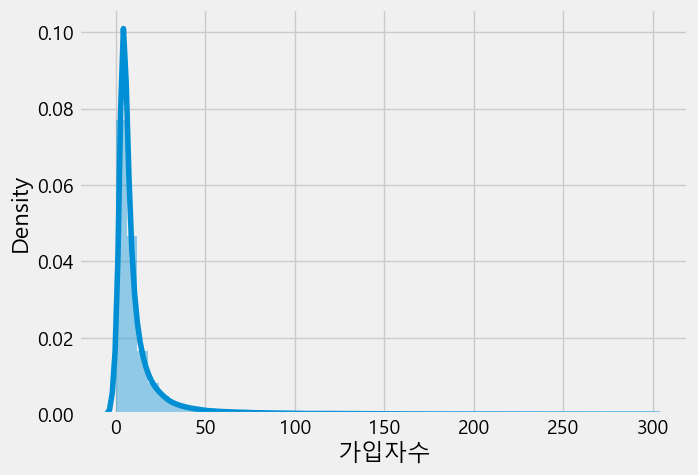

In [30]:
plt.figure(figsize=(7, 5))
sns.distplot(small['가입자수'])
plt.show()

In [31]:
small.sort_values(by='상실가입자수', ascending=False)

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
486133,October,토산 주식회사,상용 인력 공급 및 인사관리 서비스업,242,59908260,25,242,247554.79,2750608.82,33007305.79
272773,October,주식회사슈퍼크리에이티브(SuperCreativeInc.),BIZ_NO미존재사업장,205,90472660,6,205,441330.05,4903667.21,58844006.50
485690,October,주식회사이룸건설/일용/고덕강일지구 10BL 공동주택 현장,유리 및 창호 공사업,174,53967780,27,174,310159.66,3446218.39,41354620.69
10762,October,동원엔터프라이즈(주),그 외 기타 분류 안된 전문 과학 및 기술 서비스업,169,62845880,7,169,371869.11,4131879.03,49582548.32
517966,October,인방산업（주）/일용/2022년 하반기 T&I 장치/배관 정비 PKG-4,배관 및 냉ㆍ난방 공사업,200,73749600,71,165,368748.00,4097200.00,49166400.00
...,...,...,...,...,...,...,...,...,...,...
212725,October,(사.복) 새암 행복한어르신의집 노인요양원,BIZ_NO미존재사업장,10,1781100,2,0,178110.00,1979000.00,23748000.00
212724,October,（주）대진씨에스,직물 편조 원단 및 의복류 염색 가공업,7,2053140,0,0,293305.71,3258952.38,39107428.57
212723,October,원기술주식회사,건축 설계 및 관련 서비스업,4,464120,0,0,116030.00,1289222.22,15470666.67
212721,October,금선토건주식회사,화물 운송 중개 대리 및 관련 서비스업,3,661760,0,0,220586.67,2450962.96,29411555.56


## 사업장명 데이터 정제 (Cleansing)

In [32]:
import re

# 괄호안 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\（.*\）'
pattern_3 = '주식회사'

#### (주), (주식회사) 문자열 제거

In [33]:
re.sub(pattern_1, '', '브레인크루(주)')

'브레인크루'

In [34]:
re.sub(pattern_1, '', '브레인크루(주식회사)')

'브레인크루'

In [35]:
re.sub(pattern_1, '', '(주)브레인크루')

'브레인크루'

In [36]:
re.sub(pattern_2, '', '（주）타워홀딩스')

'타워홀딩스'

#### 주식회사 문자열 제거

In [37]:
re.sub(pattern_2, '', '브레인크루 주식회사')

'브레인크루 주식회사'

In [38]:
re.sub(pattern_2, '', '브레인크루주식회사')

'브레인크루주식회사'

In [39]:
re.sub(pattern_2, '', '주식회사브레인크루주식회사')

'주식회사브레인크루주식회사'

In [40]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    return text

In [41]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [42]:
df[df['사업장명'] == '엑소텍']

,자료생성월,사업장명,사업장업종코드명,가입자수,당월고지금액,신규취득자수,상실가입자수,인당고지금액,평균월급,평균연봉
395353,October,엑소텍,응용 소프트웨어 개발 및 공급업,58,14212540,1,2,245043.79,2722708.81,32672505.75


## 업종별 평균 연봉

In [44]:
df.groupby('사업장업종코드명')['평균연봉'].mean()

사업장업종코드명
1차 금속제품 도매업                  40688791.99
1차 유리제품  유리섬유 및 광학용 유리 제조업   38440677.42
BIZ_NO미존재사업장                 31660607.86
가공 및 정제염 제조업                 33513095.77
가구 내 고용활동                    21593293.28
                                 ...    
화훼류 및 식물 도매업                 30011626.40
화훼작물 재배업                     31422568.99
환경 관련 엔지니어링 서비스업             34903983.65
환경설비 건설업                     34548864.01
휴양 콘도 운영업                    33789320.37
Name: 평균연봉, Length: 1203, dtype: float64

In [45]:
df_1 = df.groupby('사업장업종코드명')['평균연봉'].mean()

In [46]:
df_1.sort_values(ascending=False).count()

1203

In [47]:
df_top100 = df_1.sort_values(ascending=False).head(50)

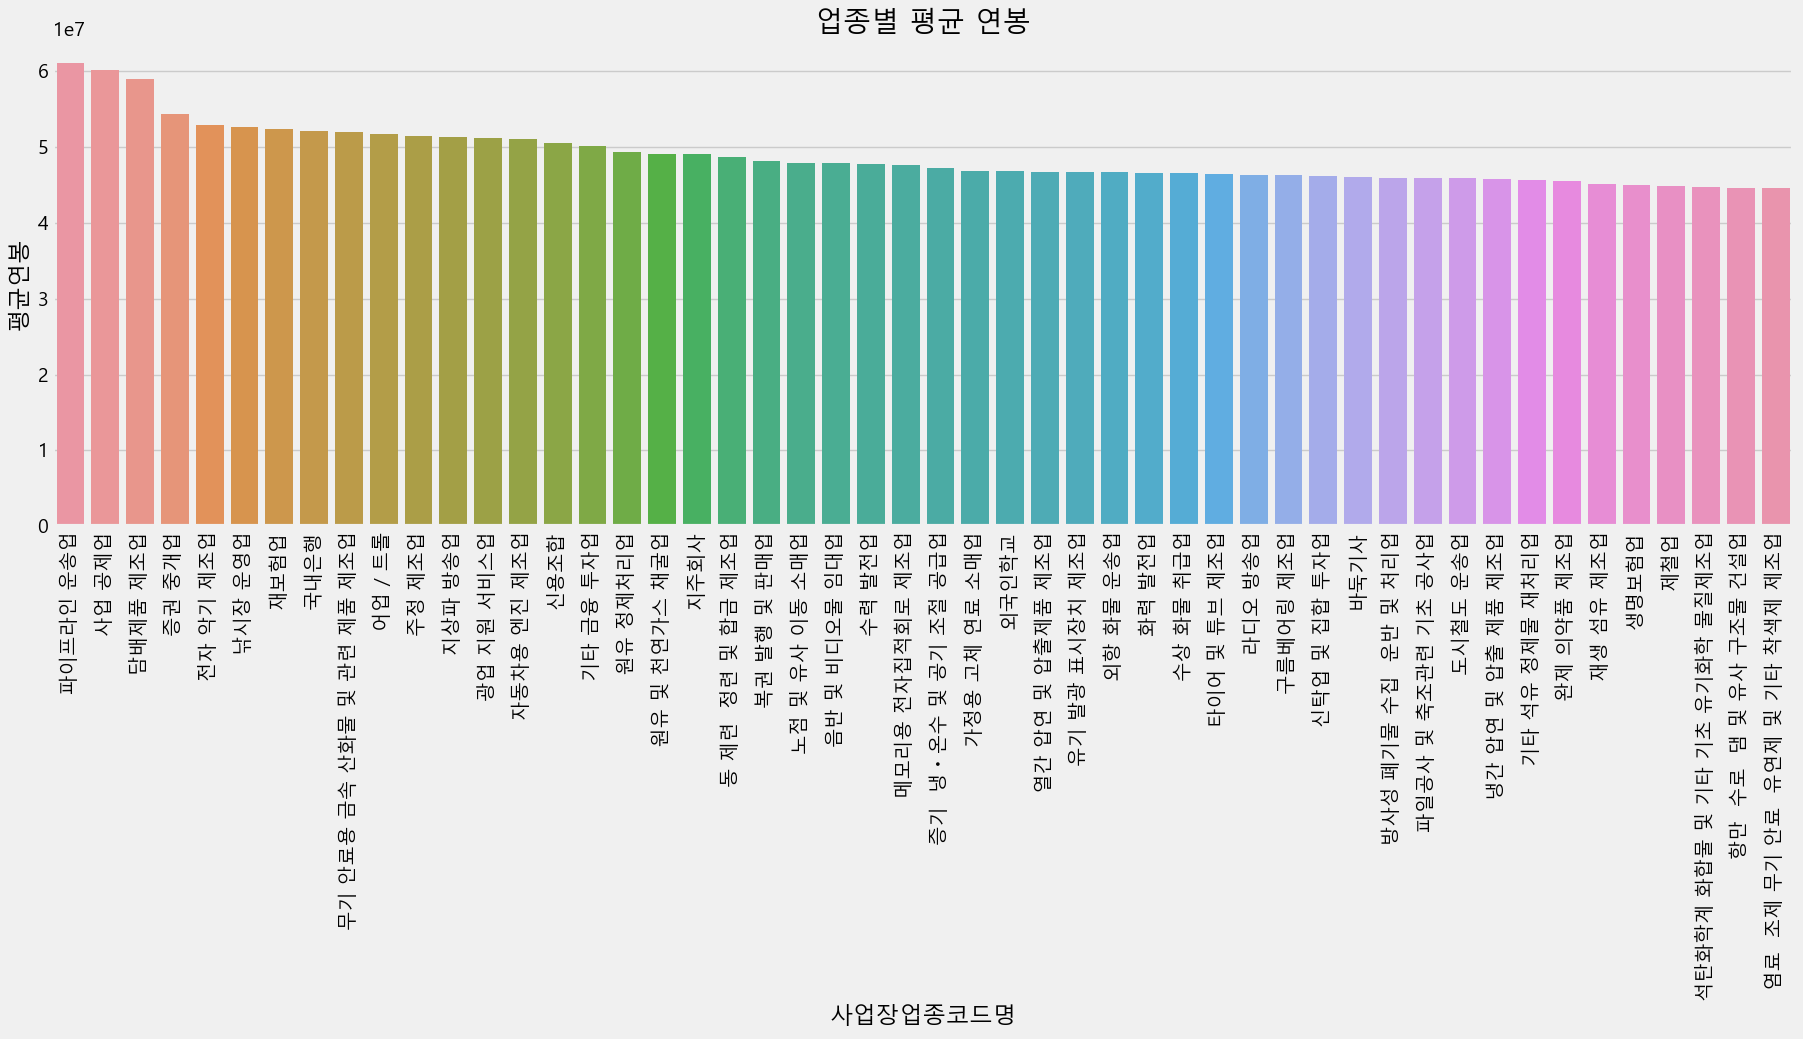

In [48]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('업종별 평균 연봉')
plt.xticks(rotation=90)
plt.show()

## 업종별 신규 인력 현황

In [50]:
df.groupby('사업장업종코드명')['신규취득자수'].mean()

사업장업종코드명
1차 금속제품 도매업                  0.21
1차 유리제품  유리섬유 및 광학용 유리 제조업   0.00
BIZ_NO미존재사업장                 0.49
가공 및 정제염 제조업                 0.42
가구 내 고용활동                    2.14
                             ... 
화훼류 및 식물 도매업                 0.23
화훼작물 재배업                     0.21
환경 관련 엔지니어링 서비스업             0.53
환경설비 건설업                     0.32
휴양 콘도 운영업                    2.20
Name: 신규취득자수, Length: 1203, dtype: float64

In [52]:
df_2 = df.groupby('사업장업종코드명')['신규취득자수'].mean()

In [53]:
df_2.sort_values(ascending=False).count()

1203

In [54]:
df_top100 = df_2.sort_values(ascending=False).head(50)

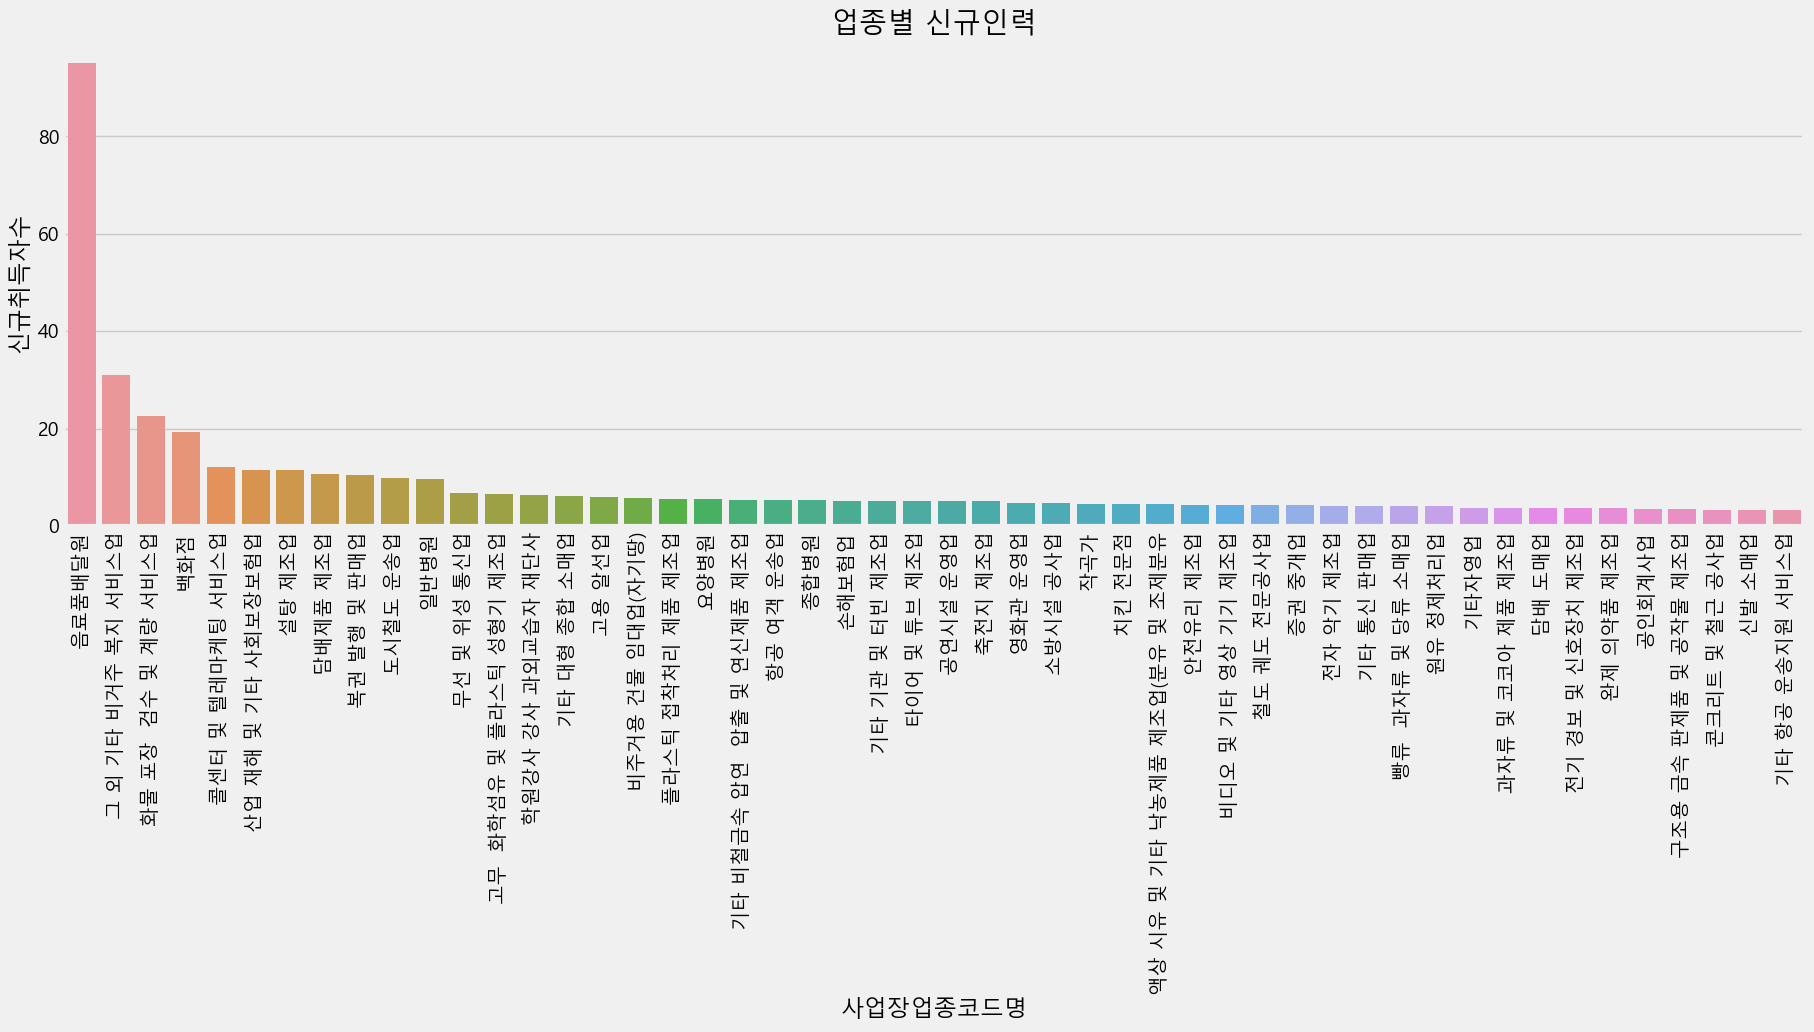

In [55]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('업종별 신규인력')
plt.xticks(rotation=90)
plt.show()

## 업종별 상실 인력 현황

In [56]:
df_3 = df.groupby('사업장업종코드명')['상실가입자수'].mean()

In [57]:
df_bot100 = df_3.sort_values(ascending=False).head(50)

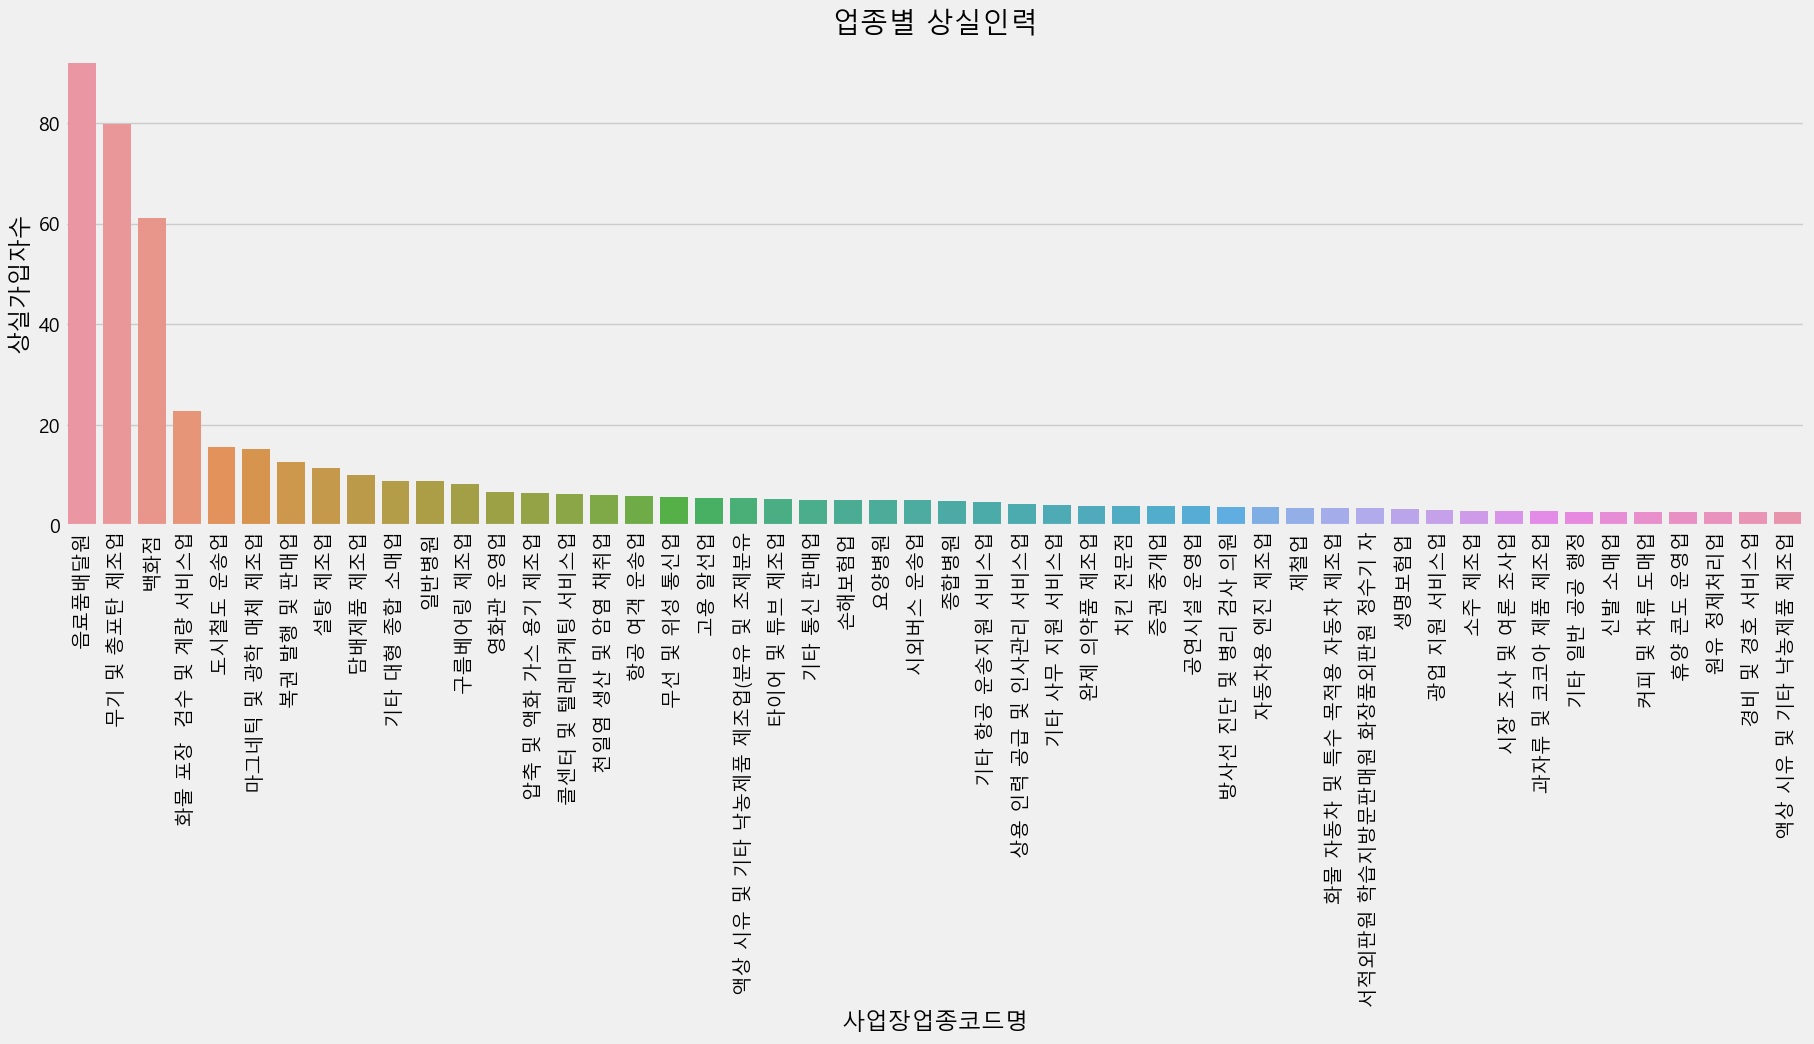

In [58]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df_bot100.index, y=df_bot100)
plt.title('업종별 상실인력')
plt.xticks(rotation=90)
plt.show()

## 업종별 단일 회사 연봉 비교 차트 그리기

In [63]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['사업장업종코드명']
    cols = ['가입자수', '평균월급', '평균연봉', '신규취득자수', '상실가입자수', '사업장업종코드명']
    filtered = df.loc[df['사업장업종코드명']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]
    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규취득자수', '상실가입자수']
    for col in compare_cols:
        plt.figure(figsize=(7, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

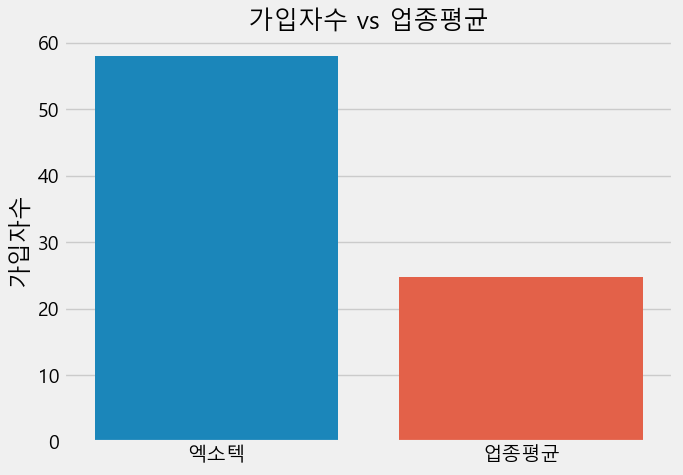

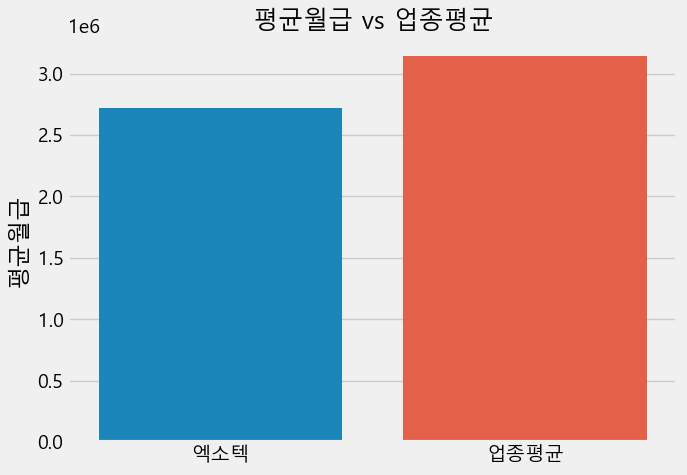

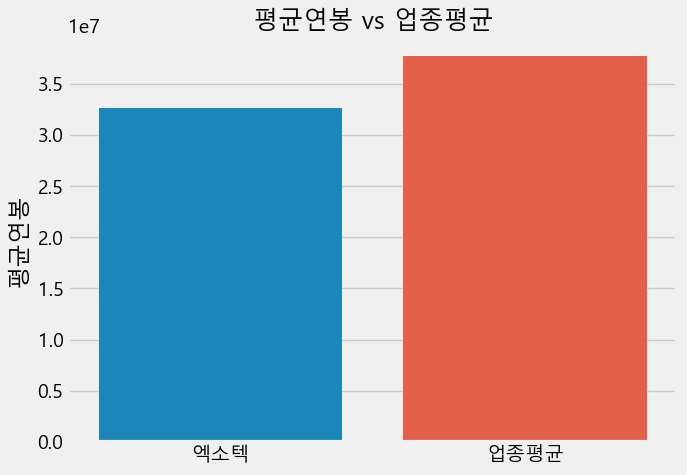

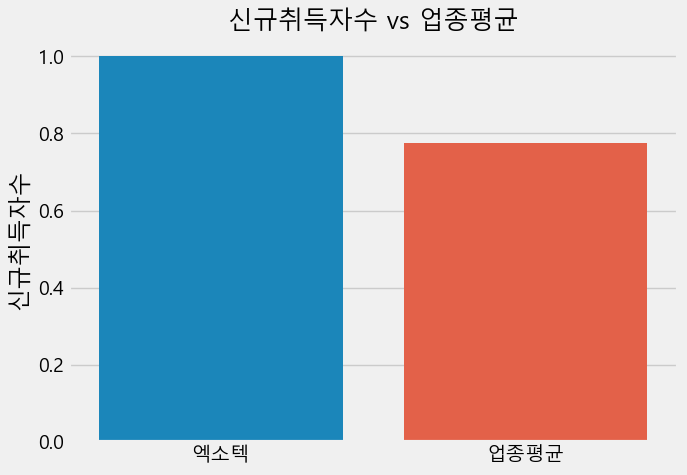

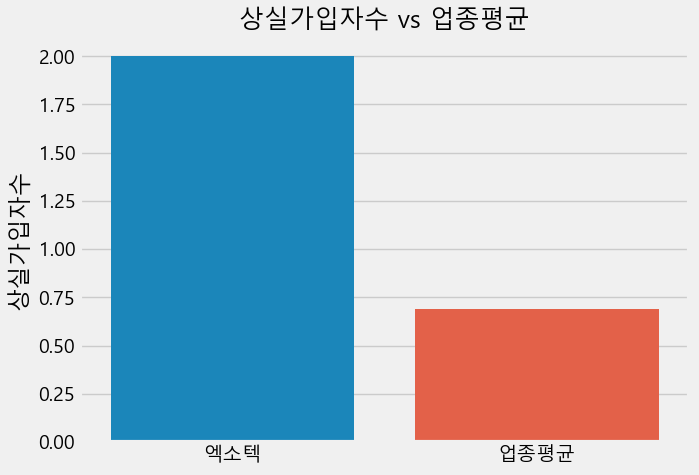

In [64]:
compare_and_visualize('엑소텍')